In [60]:
import numpy as np
from scipy.signal import convolve, windows
import matplotlib.pyplot as plt
from oasis.functions import deconvolve, gen_data

In [2]:
y1, c1, s1 = map(np.squeeze, gen_data(N=1, seed=42, sn=0.1, framerate=10))
y2, c2, s2 = map(np.squeeze, gen_data(N=1, seed=5, sn=0.1, framerate=20))
y3, c3, s3 = map(np.squeeze, gen_data(N=1, seed=55, sn=0.1, framerate=30))

# Spike Inference From Calcium Traces

## Convolution

In this section, we will see how calcium signals are produced from spikes using a process called convolution. When a neuron fires, it does not just cause a sharp, brief change in the signal. Instead, it produces a smooth, slowly fading signal that we observe in calcium imaging. We simulate this by convolving a spike train with a calcium kernel which a shape that describes how the signal should look after a single spike. This helps us understand how fast spiking activity is transformed into the slower calcium traces we record.

visualizing spike trains

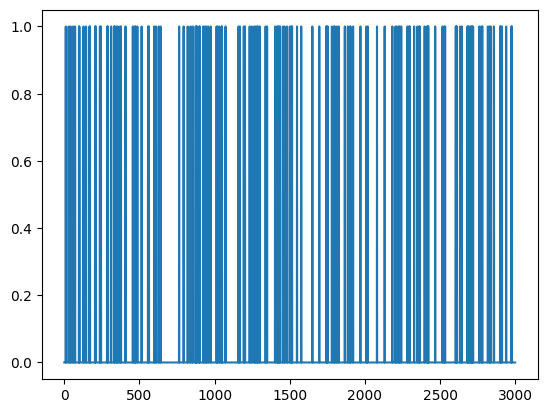

In [3]:
plt.plot(s1)

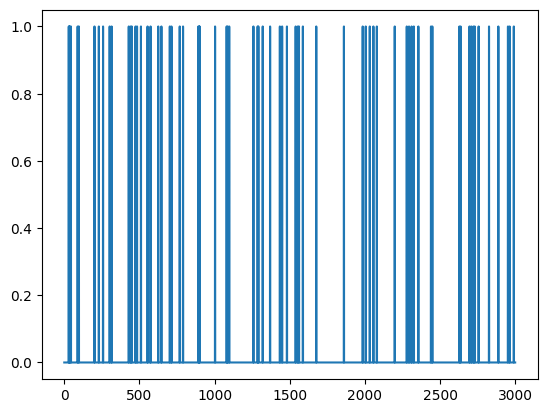

In [4]:
plt.plot(s2)

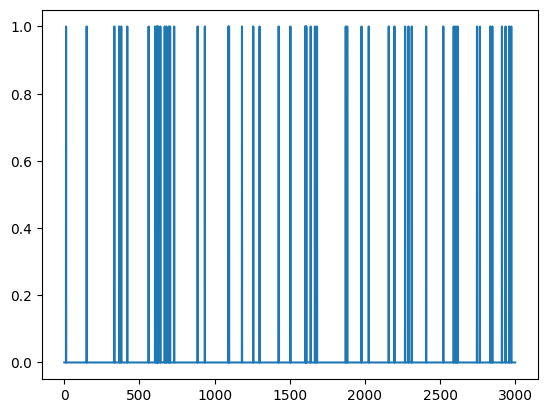

In [5]:
plt.plot(s3)

visualizing kernels

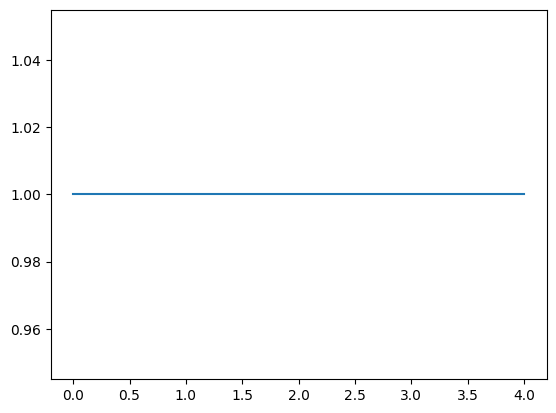

In [6]:
kernel = windows.boxcar(5)
plt.plot(kernel)

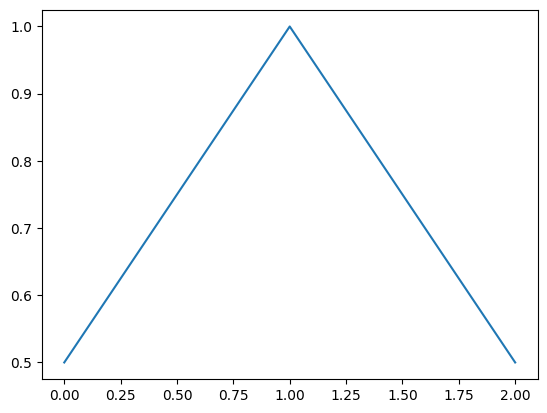

In [7]:
kernel = windows.triang(3)
plt.plot(kernel)

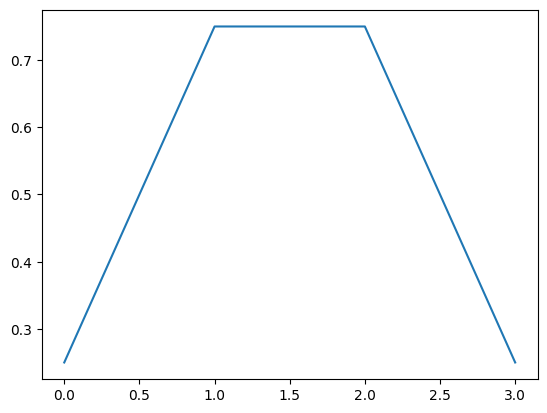

In [8]:
kernel = windows.triang(4)
plt.plot(kernel)

exponential decay kernel (visualize with different tau values)

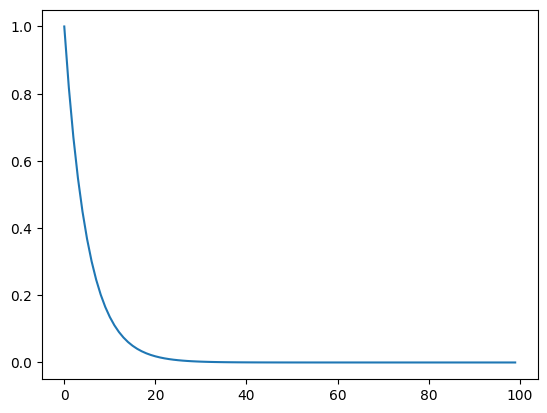

In [9]:
tau = 5
t = np.arange(100)
kernel = np.exp(-t / tau)
plt.plot(kernel)

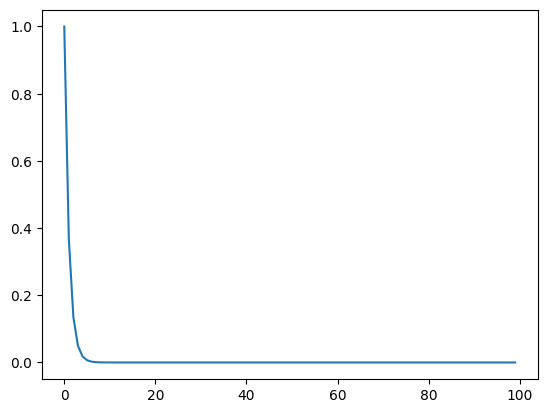

In [10]:
tau = 1
t = np.arange(100)
kernel = np.exp(-t / tau)
plt.plot(kernel)

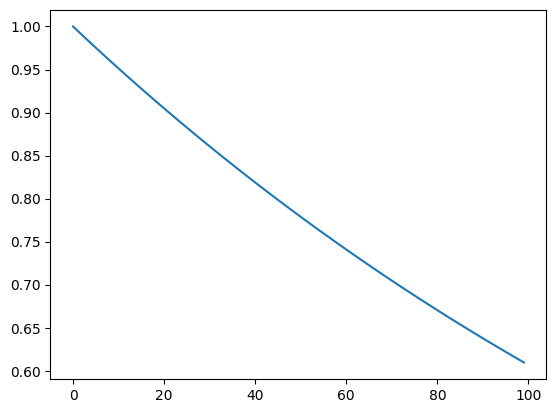

In [11]:
tau = 200
t = np.arange(100)
kernel = np.exp(-t / tau)
plt.plot(kernel)

apply exponential decay kernel

(100.0, 500.0)

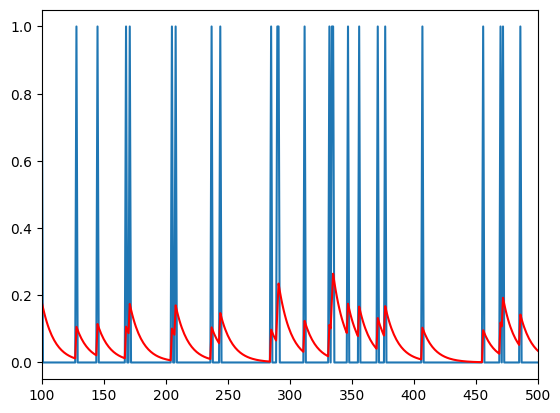

In [12]:
tau = 10
length = 101
t = np.arange(length)
kernel_unnorm = np.exp(-t / tau)
kernel = kernel_unnorm / kernel_unnorm.sum()

convolved_trace = convolve(s1, kernel, mode='full')
plt.plot(s1)
plt.plot(convolved_trace[:-length+1], color='r')
plt.xlim(100, 500)

(100.0, 500.0)

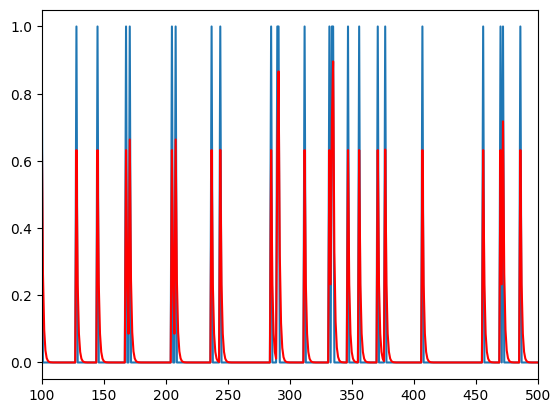

In [13]:
tau = 1
length = 101
t = np.arange(length)
kernel_unnorm = np.exp(-t / tau)
kernel = kernel_unnorm / kernel_unnorm.sum()

convolved_trace = convolve(s1, kernel, mode='full')
plt.plot(s1)
plt.plot(convolved_trace[:-length+1], color='r')
plt.xlim(100, 500)

(100.0, 500.0)

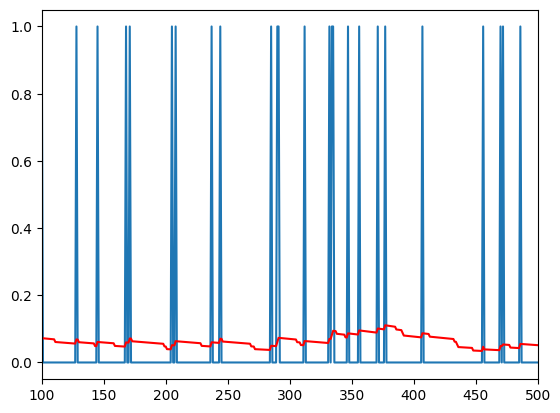

In [14]:
tau = 200
length = 101
t = np.arange(length)
kernel_unnorm = np.exp(-t / tau)
kernel = kernel_unnorm / kernel_unnorm.sum()

convolved_trace = convolve(s1, kernel, mode='full')
plt.plot(s1)
plt.plot(convolved_trace[:-length+1], color='r')
plt.xlim(100, 500)

double exponential decay kernel (visualizing with different tau_rise and tau_decay)

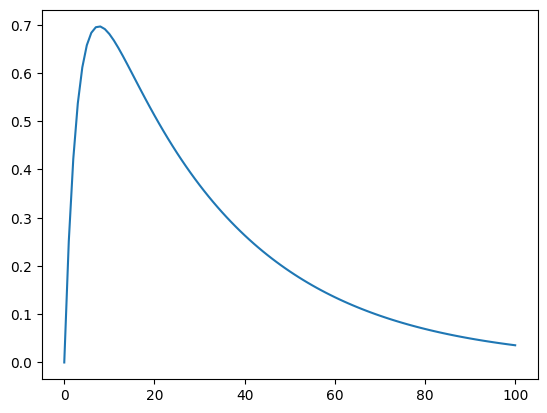

In [15]:
tau_rise = 3
tau_decay = 30
kernel = np.exp(-t / tau_decay) - np.exp(-t / tau_rise)

plt.plot(kernel)

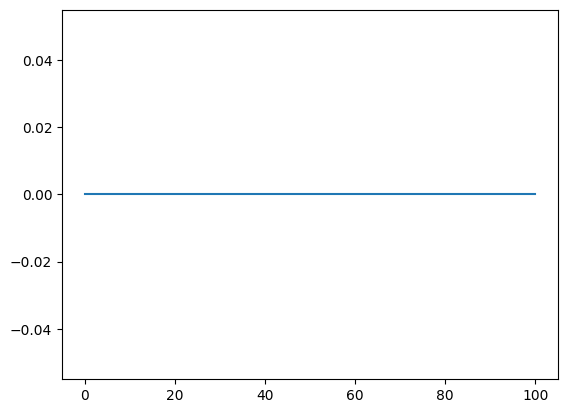

In [16]:
tau_rise = 30
tau_decay = 30
kernel = np.exp(-t / tau_decay) - np.exp(-t / tau_rise)

plt.plot(kernel)

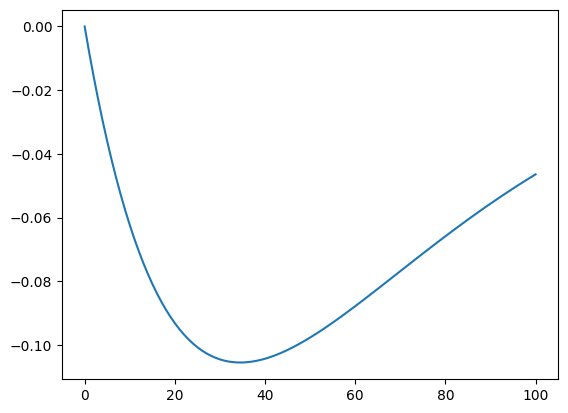

In [17]:
tau_rise = 40
tau_decay = 30
kernel = np.exp(-t / tau_decay) - np.exp(-t / tau_rise)

plt.plot(kernel)

apply double exponential decay kernel

(100.0, 500.0)

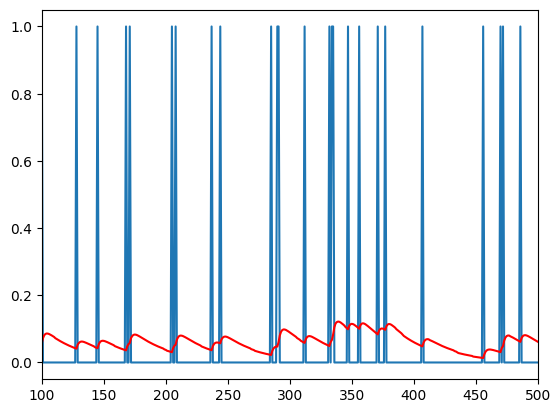

In [18]:
tau_rise = 2
tau_decay = 30
kernel_unnorm = np.exp(-t / tau_decay) - np.exp(-t / tau_rise)
kernel = kernel_unnorm / kernel_unnorm.sum()

convolved_trace = convolve(s1, kernel, mode='full')
plt.plot(s1)
plt.plot(convolved_trace[:-length+1], color='r')
plt.xlim(100, 500)

C:\Users\sangeetha\AppData\Local\Temp\ipykernel_2364\1200116051.py:4: RuntimeWarning: invalid value encountered in divide
  kernel = kernel_unnorm / kernel_unnorm.sum()


(100.0, 500.0)

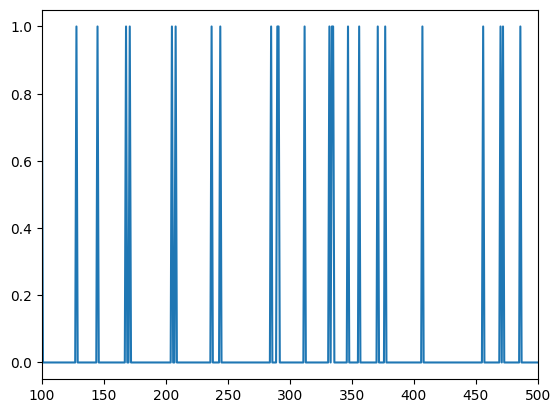

In [19]:
tau_rise = 30
tau_decay = 30
kernel_unnorm = np.exp(-t / tau_decay) - np.exp(-t / tau_rise)
kernel = kernel_unnorm / kernel_unnorm.sum()

convolved_trace = convolve(s1, kernel, mode='full')
plt.plot(s1)
plt.plot(convolved_trace[:-length+1], color='r')
plt.xlim(100, 500)

(100.0, 500.0)

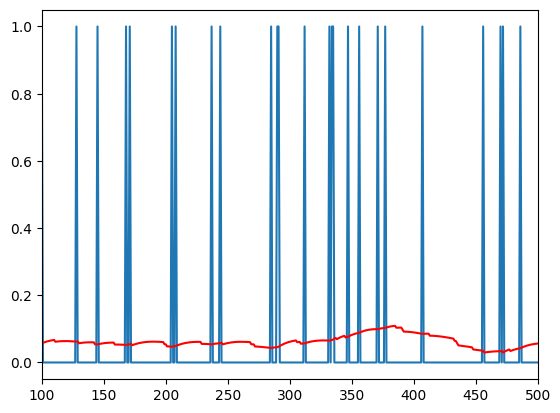

In [20]:
tau_rise = 40
tau_decay = 30
kernel_unnorm = np.exp(-t / tau_decay) - np.exp(-t / tau_rise)
kernel = kernel_unnorm / kernel_unnorm.sum()

convolved_trace = convolve(s1, kernel, mode='full')
plt.plot(s1)
plt.plot(convolved_trace[:-length+1], color='r')
plt.xlim(100, 500)

## OASIS

Now that we know how spikes generate calcium signals using a kernel, we want to do the reverse: go from calcium traces back to the original spikes. This is done through deconvolution. OASIS is a commonly used algorithm that estimates spike timings by finding a sparse set of events that, when convolved with a known calcium kernel, best matches the observed signal. The output is a continuous signal where higher values suggest stronger or more likely spike events.

plot raw traces

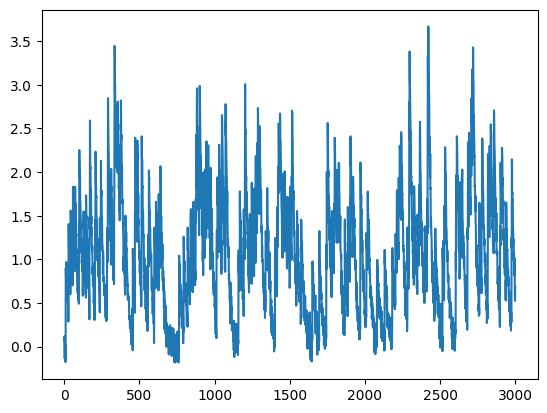

In [21]:
plt.plot(y1)

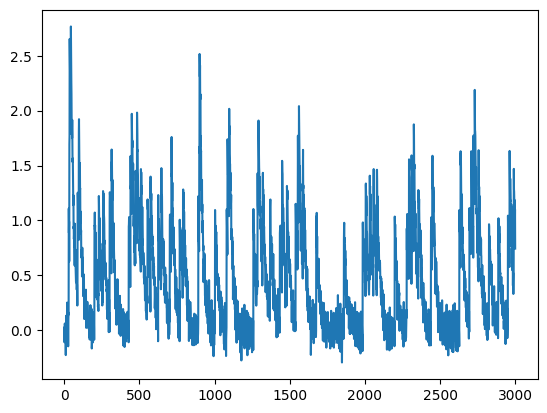

In [22]:
plt.plot(y2)

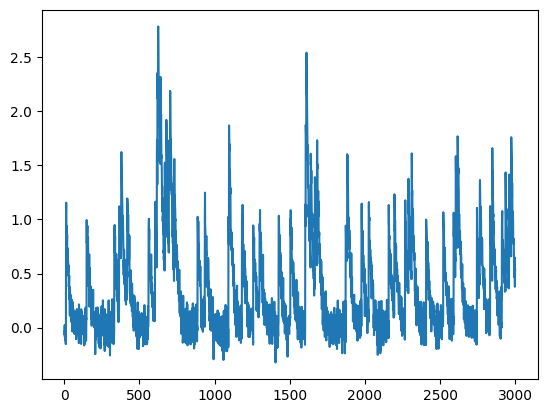

In [23]:
plt.plot(y3)

plot denoised signal from oasis-deconvolv

c:\Users\sangeetha\miniforge3\envs\calim\Lib\site-packages\oasis\functions.py:817: FutureWarning: Beginning in SciPy 1.17, multidimensional input will be treated as a batch, not `ravel`ed. To preserve the existing behavior and silence this warning, `ravel` arguments before passing them to `toeplitz`.
  A = scipy.linalg.toeplitz(xc[np.arange(lags)],


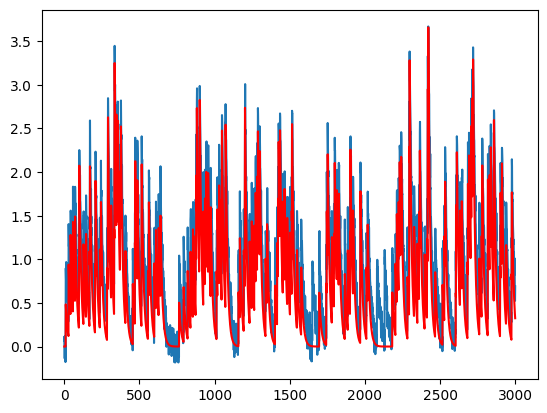

In [24]:
denoised, _, _, _, _ = deconvolve(y1)
plt.plot(y1)
plt.plot(denoised, color='r')

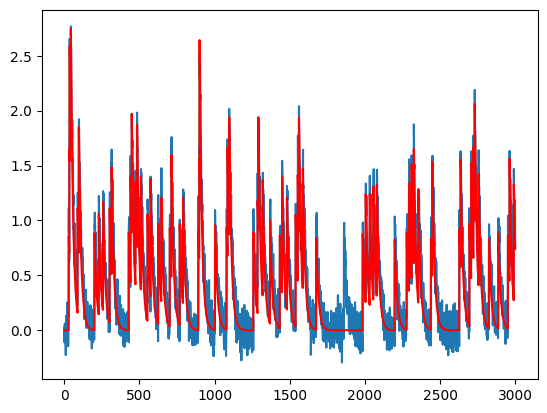

In [25]:
denoised, _, _, _, _ = deconvolve(y2)
plt.plot(y2)
plt.plot(denoised, color='r')

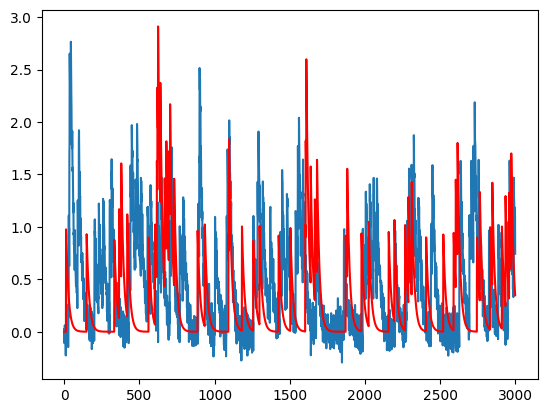

In [26]:
denoised, _, _, _, _ = deconvolve(y3)
plt.plot(y2)
plt.plot(denoised, color='r')

spike trains from raw traces

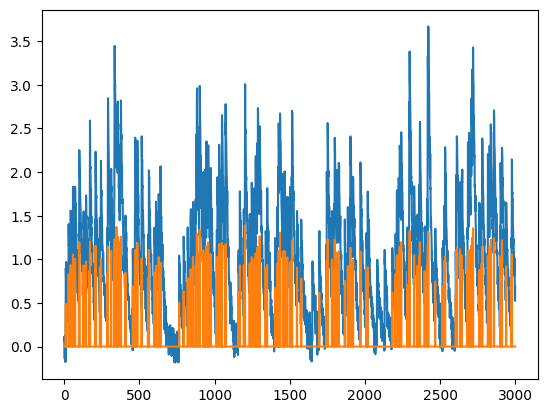

In [27]:
_, inferred_spikes, _, _, _ = deconvolve(y1)
plt.plot(y1)
plt.plot(inferred_spikes)

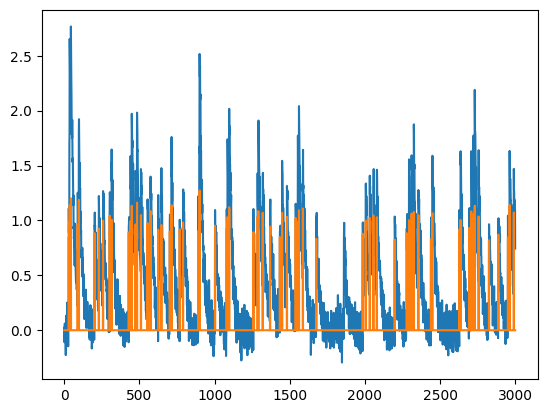

In [28]:
_, inferred_spikes, _, _, _ = deconvolve(y2)
plt.plot(y2)
plt.plot(inferred_spikes)

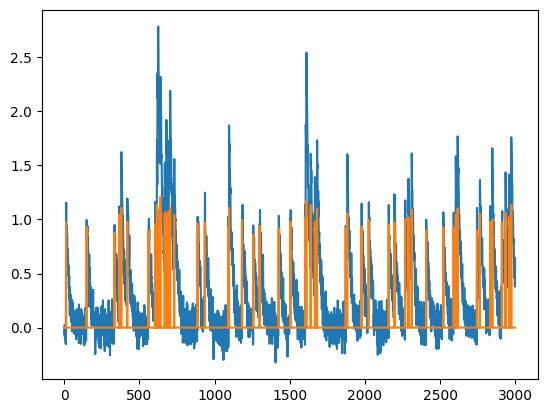

In [29]:
_, inferred_spikes, _, _, _ = deconvolve(y3)
plt.plot(y3)
plt.plot(inferred_spikes)

Decay (gamma) factor (low: fast decay, high: slow decay)

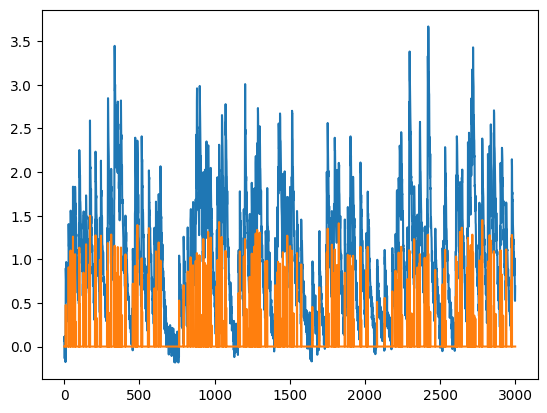

In [30]:
_, inferred_spikes, _, _, _ = deconvolve(y1, g=(0.90,))
plt.plot(y1)
plt.plot(inferred_spikes)

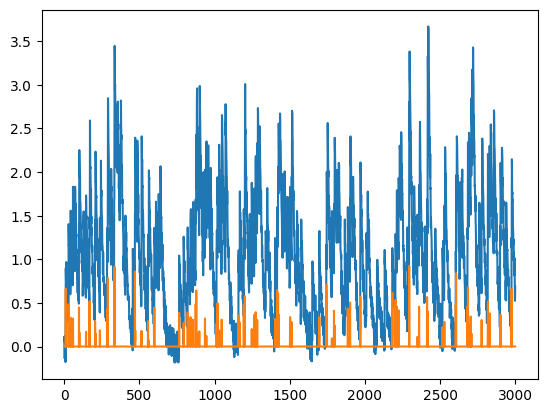

In [31]:
_, inferred_spikes, _, _, _ = deconvolve(y1, g=(0.99,))
plt.plot(y1)
plt.plot(inferred_spikes)

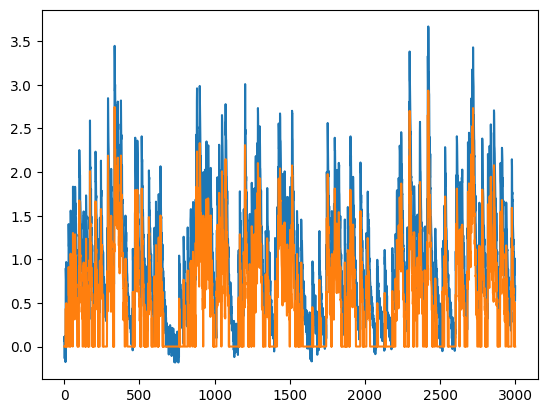

In [32]:
_, inferred_spikes, _, _, _ = deconvolve(y1, g=(0.1,))
plt.plot(y1)
plt.plot(inferred_spikes)

## Event Detection from Deconvolved Trace

The output from OASIS is continuous, showing how likely or strong each spike might be. But for many kinds of analysis, we need clear events where either a spike happened, or it did not. To do this, we apply a threshold to the OASIS output. Any value above the threshold is considered a spike.

In [33]:
_, inferred_spikes1, _, _, _ = deconvolve(y1)
_, inferred_spikes2, _, _, _ = deconvolve(y2)
_, inferred_spikes3, _, _, _ = deconvolve(y3)

c:\Users\sangeetha\miniforge3\envs\calim\Lib\site-packages\oasis\functions.py:817: FutureWarning: Beginning in SciPy 1.17, multidimensional input will be treated as a batch, not `ravel`ed. To preserve the existing behavior and silence this warning, `ravel` arguments before passing them to `toeplitz`.
  A = scipy.linalg.toeplitz(xc[np.arange(lags)],


Thresholding (global value)

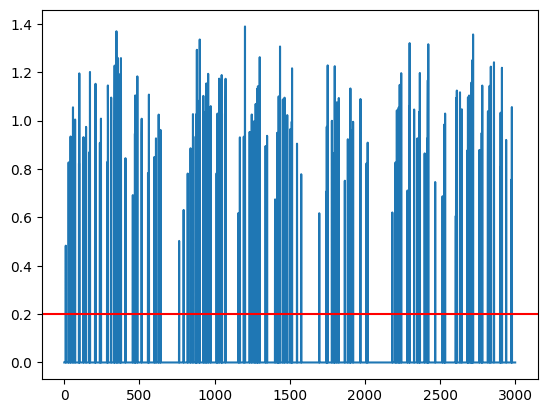

In [34]:
thresh = 0.2
plt.plot(inferred_spikes1)
plt.axhline(thresh, color='r')

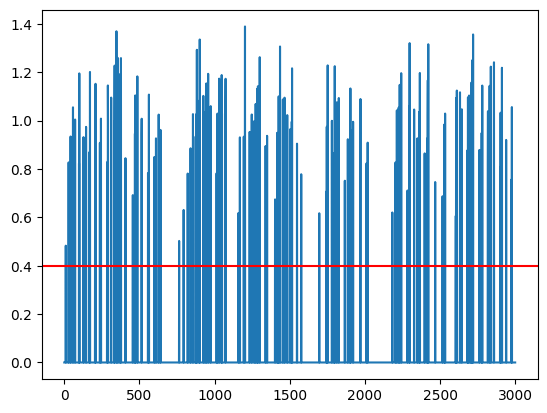

In [35]:
thresh = 0.4
plt.plot(inferred_spikes1)
plt.axhline(thresh, color='r')

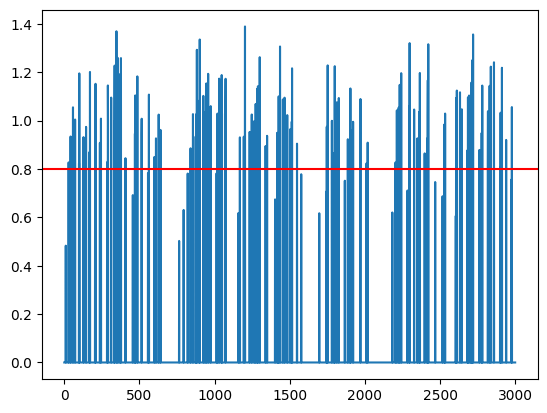

In [36]:
thresh = 0.8
plt.plot(inferred_spikes1)
plt.axhline(thresh, color='r')

Threshold (from max value)

In [46]:
thresh = 0.5 * np.max(inferred_spikes1)
len(np.where(inferred_spikes1 > thresh)[0])

146

In [48]:
thresh = 0.01 * np.max(inferred_spikes1)
len(np.where(inferred_spikes1 > thresh)[0])

156

In [49]:
thresh = 0.9 * np.max(inferred_spikes1)
len(np.where(inferred_spikes1 > thresh)[0])

11

Spike times

In [56]:
fr = 10
thresh = 0.2 * np.max(inferred_spikes1)
spk_ind = np.where(inferred_spikes1 > thresh)[0]
spk_times1 = spk_ind / fr
spk_times1.min(), spk_times1.max()

(np.float64(1.0), np.float64(297.7))

In [57]:
fr = 20
thresh = 0.2 * np.max(inferred_spikes2)
spk_ind = np.where(inferred_spikes2 > thresh)[0]
spk_times2 = spk_ind / fr
spk_times2.min(), spk_times2.max()

(np.float64(1.5), np.float64(149.5))

In [58]:
fr = 30
thresh = 0.2 * np.max(inferred_spikes3)
spk_ind = np.where(inferred_spikes3 > thresh)[0]
spk_times3 = spk_ind / fr
spk_times3.min(), spk_times3.max()

(np.float64(0.4), np.float64(99.1))

## Saving Timestamped Data

Once we have identified when spikes likely occurred by thresholding, we save the corresponding time points. These timestamped events are useful for further analysis, such as comparing activity across cells, aligning activity to behavioral events, or building summary statistics. In this section, we will save these spike times as an array of indices or timestamps.

Save one by one

In [61]:
np.save('spk1.npy', spk_times1)

In [62]:
np.save('spk2.npy', spk_times2)

In [63]:
np.save('spk3.npy', spk_times3)

Load and plot from npy file

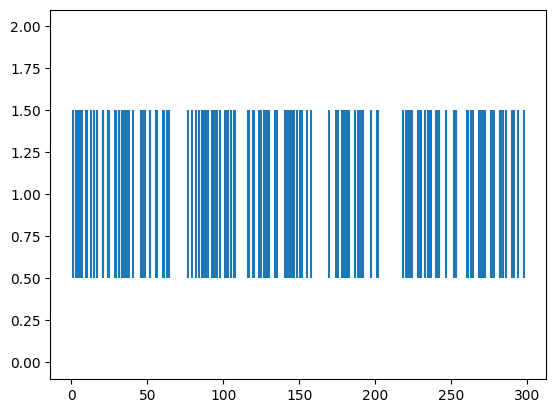

In [64]:
spk1 = np.load('spk1.npy')
plt.eventplot(spk1)

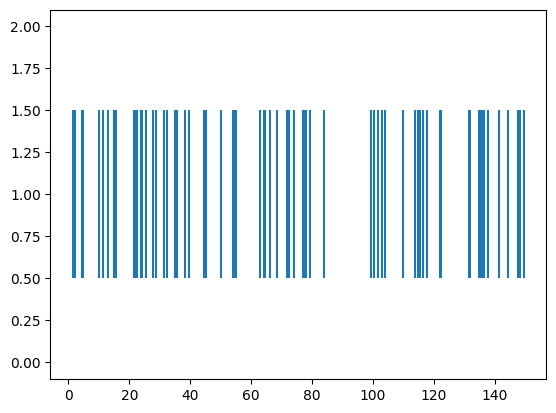

In [65]:
spk2 = np.load('spk2.npy')
plt.eventplot(spk2)

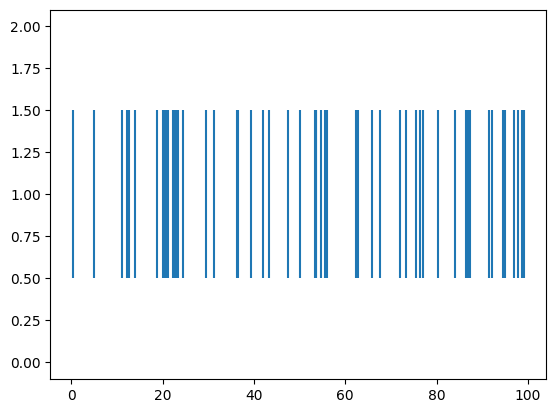

In [67]:
spk3 = np.load('spk3.npy')
plt.eventplot(spk3)

Put multiple spike trains in one file

In [72]:
spks = np.array([spk_times1, spk_times2], dtype=object)
np.save('spk_1_2.npy', spks)

In [77]:
spks = np.array([spk_times2, spk_times3], dtype=object)
np.save('spk_2_3.npy', spks)

In [78]:
spks = np.array([spk_times1, spk_times2, spk_times3], dtype=object)
np.save('spks.npy', spks)

Load and plot numpy with multiple spikes

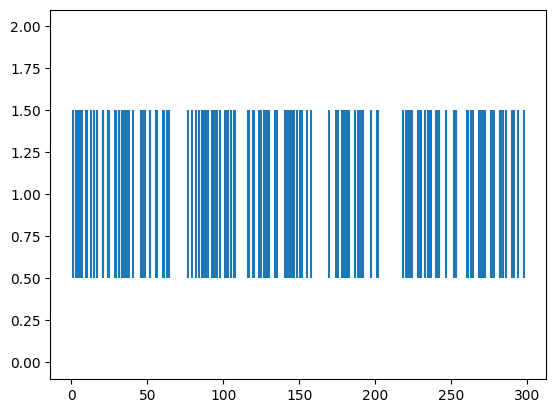

In [79]:
spks = np.load('spks.npy', allow_pickle=True)
plt.eventplot(spks[0])

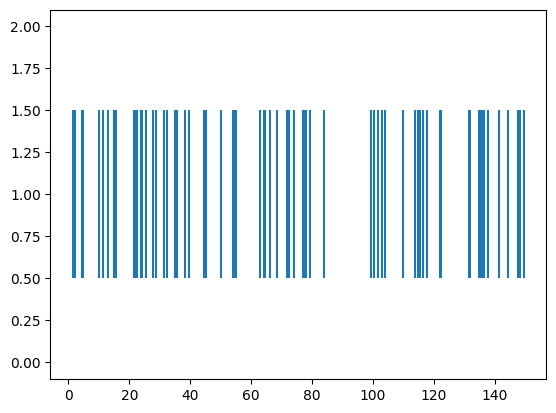

In [80]:
spks = np.load('spks.npy', allow_pickle=True)
plt.eventplot(spks[1])

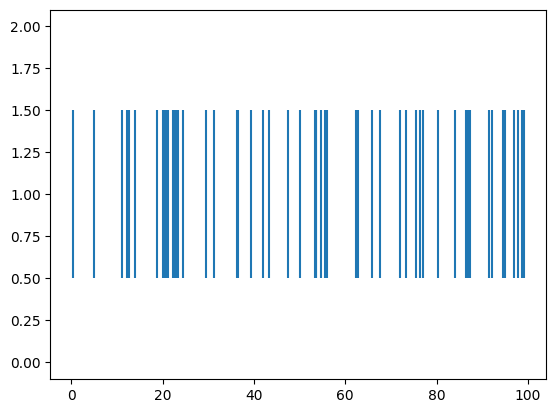

In [81]:
spks = np.load('spks.npy', allow_pickle=True)
plt.eventplot(spks[2])